In [ ]:
!pip install torch torchvision torchaudio


In [ ]:
import torch
print("GPU available:", torch.cuda.is_available())


GPU available: False


In [ ]:
pip install torchbnn

In [ ]:
import numpy as np
from sklearn import datasets
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim

import torchbnn as bnn

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BNN/TensorSetNvsHL.csv')

In [ ]:
print(df)

       N      T1/2
0      6   0.11940
1      6   0.17820
2      8   0.00858
3      7  13.74000
4      8   0.02147
..   ...       ...
564  134   9.70000
565  135   5.90000
566  136  10.60000
567  137   9.50000
568  146   0.90000

[569 rows x 2 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       569 non-null    int64  
 1   T1/2    569 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.0 KB


In [ ]:
X = df['N']
Y = df['T1/2']

In [ ]:
df.N.value_counts()

N
78     10
80     10
73      9
79      9
71      9
       ..
134     1
135     1
136     1
137     1
146     1
Name: count, Length: 115, dtype: int64

In [ ]:
import pandas as pd
import torch
from sklearn.preprocessing import StandardScaler, LabelEncoder
from torch.utils.data import TensorDataset


In [ ]:
data = df.values
dataset = torch.tensor(data, dtype=torch.float32)


In [ ]:
print(dataset, dataset.shape)

tensor([[6.0000e+00, 1.1940e-01],
        [6.0000e+00, 1.7820e-01],
        [8.0000e+00, 8.5800e-03],
        ...,
        [1.3600e+02, 1.0600e+01],
        [1.3700e+02, 9.5000e+00],
        [1.4600e+02, 9.0000e-01]]) torch.Size([569, 2])


In [ ]:
import torch
from sklearn.model_selection import train_test_split

n_tensor = dataset[:, 0]
thalf_tensor = dataset[:, 1]

x_train, x_test, y_train, y_test = train_test_split(n_tensor, thalf_tensor, test_size=0.2, random_state=42)



In [ ]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)

tensor([ 21.,  48.,  22.,  57.,  19.,  14.,  63.,  41.,  45.,  98.,  28.,  84.,
         34.,  88.,  72.,  18.,   6., 132.,  70.,  63.,  53.,  15.,  78.,  59.,
         29.,  49.,  81.,  11.,  75.,  61.,  98.,  82.,  89.,  54.,  50.,  85.,
         21.,  83.,  20.,  28.,  55.,  32.,  58., 146.,  84.,  81.,  51.,  71.,
         44.,  75.,  83.,  80.,  22., 102.,  44.,  96.,  56.,  39.,  36.,  79.,
         45., 105.,  59.,  51.,  80.,  88.,  97.,  80.,  31.,  39.,  93.,   9.,
        104.,  12.,  42.,  78.,  23.,  92.,  65., 106.,  62.,  65.,  23.,  54.,
         15.,  79.,  63., 102.,  16.,  82.,  68.,  54.,  68.,  76.,  44.,  38.,
        106., 119.,  93.,  43.,  17.,  30.,  68.,  42.,  79.,  70.,  24.,  96.,
         14.,  10.,  65.,  25.,  60.,  95.,  68.,  91., 100.,  99.,  91.,  91.,
        101.,  29.,  47.,  67.,  27.,  16., 104.,  77.,  72.,  66.,  10.,  33.,
         19.,  56.,  61.,  78.,  71.,  16.,  22., 104.,  83.,   7.,  97.,  66.,
         55.,  16.,  24.,  53.,  18.,  3

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

torch.Size([455])
torch.Size([455])
torch.Size([114])
torch.Size([114])


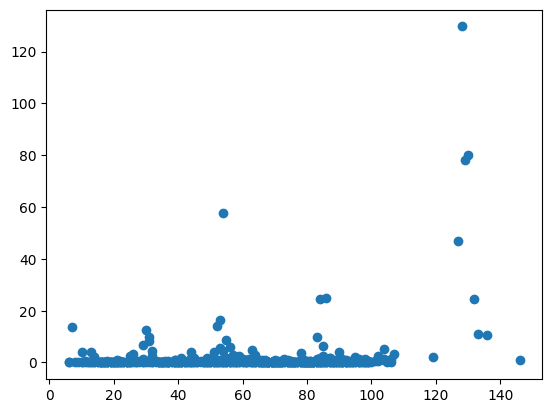

In [ ]:
x = x_train
y = y_train
x = torch.unsqueeze(x, dim=1)
y = torch.unsqueeze(y, dim=1)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

In [ ]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=1),
)

In [ ]:
mse_loss = nn.MSELoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)

optimizer = optim.Adam(model.parameters(), lr=0.0009998)

In [ ]:
kl_weight = 0.0099

In [ ]:
x_train = torch.unsqueeze(x_train, dim=1)
y_train = torch.unsqueeze(y_train, dim=1)

for step in range(1000):
    pre = model(x_train)
    mse = mse_loss(pre, y_train)
    kl = kl_loss(model)
    cost = mse + kl_weight * kl

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()


In [ ]:
print('- MSE : %2.2f, KL : %2.2f' % (mse.item(), kl.item()))

- MSE : 190.92, KL : 6.49


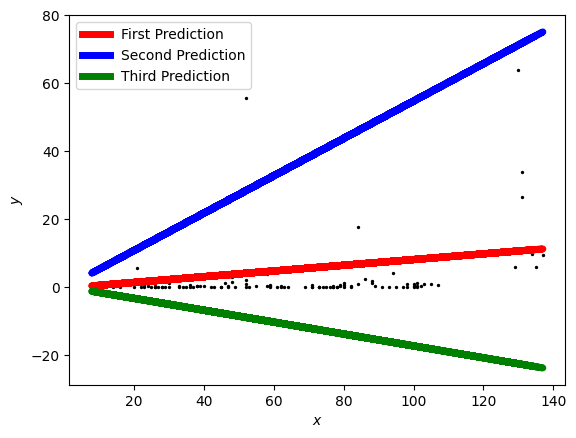

In [ ]:
x_test = torch.unsqueeze(x_test, dim=1)
y_test = torch.unsqueeze(y_test, dim=1)

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.scatter(x_test.data.numpy(), y_test.data.numpy(), color='k', s=2)

y_predict = model(x_test)
plt.plot(x_test.data.numpy(), y_predict.data.numpy(), 'r-', linewidth=5, label='First Prediction')

y_predict = model(x_test)
plt.plot(x_test.data.numpy(), y_predict.data.numpy(), 'b-', linewidth=5, label='Second Prediction')

y_predict = model(x_test)
plt.plot(x_test.data.numpy(), y_predict.data.numpy(), 'g-', linewidth=5, label='Third Prediction')

plt.legend()

plt.show()


###in the above graph, the red line is the closest fit and the area between the blue and green lines are the further predictions considering the outliers. unfortunately i couldnt colour inside that area like it was mentioned in the paper


In [ ]:
print('torch saving...')

torch saving...


In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/BNN/BayesianNeuralNetwork.pth')